# San Franscico Bay Ford GoBike Data Exploratory Analysis
## by Yusuf Olaniyi

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [70]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.shape

(183412, 16)

In [73]:
df_copy = df.copy()

In [74]:
df_copy.dropna(inplace=True)

In [9]:
df_copy.shape

(174952, 16)

In [10]:
df_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### What is the structure of your dataset?

> 174952, 16

### What is/are the main feature(s) of interest in your dataset?

> User type, member gender,duration,start time and bike share 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, start_station_name, member_gender,user_type,bike_share_for_all_trip

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.





In [13]:
base_color = sb.color_palette()[0]
def countplt(column,lbl):
    '''produces a countplot of the column passed as an argument'''
    sb.countplot(data=df_copy,x=column,color=base_color,label=lbl)
    plt.legend()
    

Question: What gender take more bike rides?

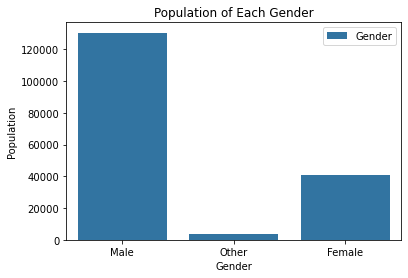

In [14]:
countplt('member_gender','Gender')
plt.xlabel('Gender')
plt.ylabel('Population')
plt.title('Population of Each Gender');

From the plot above, the male took more ride that every other gender

Question: What are the amount of individual and shared bike ride?

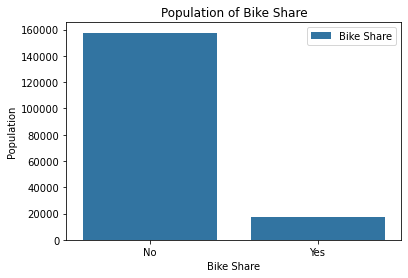

In [15]:
#sb.countplot(data=df_copy,x='bike_share_for_all_trip',color=base_color,label='Status')
countplt('bike_share_for_all_trip','Bike Share')
plt.xlabel('Bike Share')
plt.ylabel('Population')
plt.title('Population of Bike Share');

There are more individual rides compared to shared ride.

Question: What is the proportion of each User type 

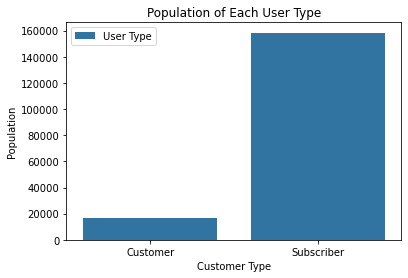

In [71]:
#sb.countplot(data=df_copy,x='user_type',color=base_color,label='Status')
countplt('user_type','User Type')
plt.xlabel('Customer Type')
plt.ylabel('Population')
plt.title('Population of Each User Type');

Subscribers take more rides compared to customers.

In [17]:
df_copy.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

Question: What the distribution of the duration_sec?

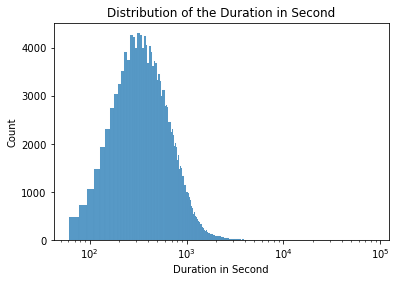

In [75]:
sb.histplot(data=df_copy,x='duration_sec')
plt.xlabel('Duration in Second')
plt.xscale('log')
plt.title('Distribution of the Duration in Second');

From the plot above, It can be deduced that the duration has some outliers and it's right skewed. 

In [76]:
# Get the 0.99 percentile of the duration
low_dur,high_dur = df_copy['duration_sec'].quantile([0,0.99])

In [77]:
# Remove outliers in the duration
df_copy['duration_sec'] = df_copy[df_copy['duration_sec'].between(low_dur,high_dur)]['duration_sec']

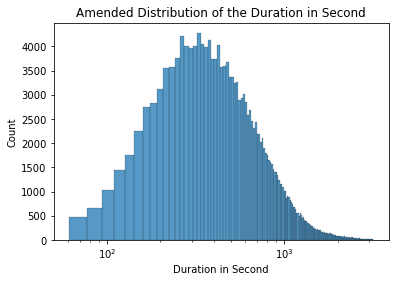

In [79]:
sb.histplot(data=df_copy,x='duration_sec')
plt.xlabel('Duration in Second')
plt.xscale('log')
plt.title('Amended Distribution of the Duration in Second');

The above plot shows that the duration is uniformly distributed

Question: What is the relative population of each members year of birth?

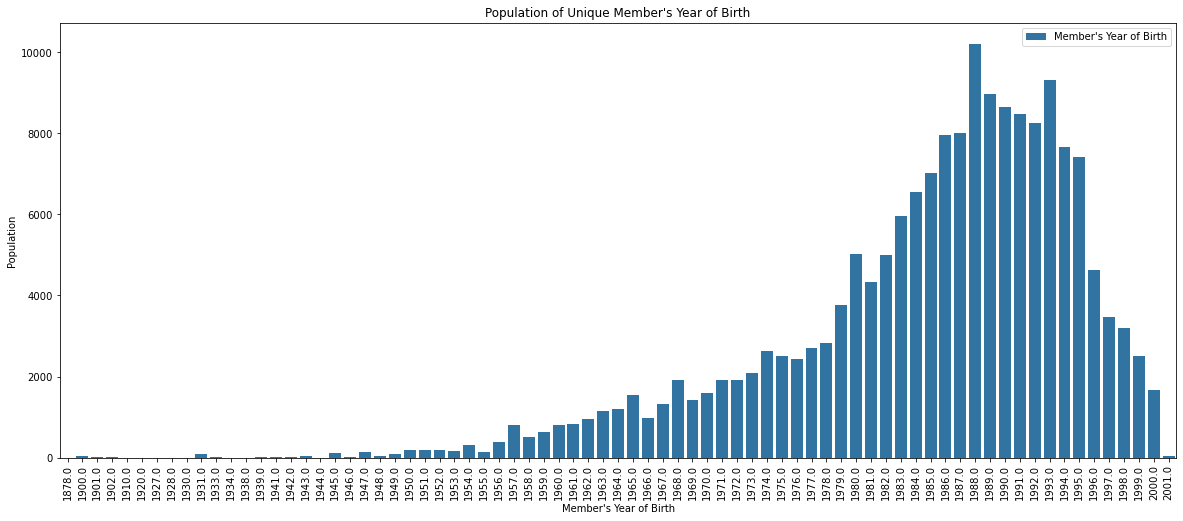

In [78]:
plt.figure(figsize=(20,8))
countplt('member_birth_year','Member\'s Year of Birth')
plt.xlabel('Member\'s Year of Birth')
plt.ylabel('Population')
plt.title('Population of Unique Member\'s Year of Birth')
plt.xticks(rotation=90);

A larger percentage of the members where given birth to between 1980 to 1995

Group the members year of birth based on decade to get a clearer view of the members year per decade

In [22]:
df_copy.loc[df_copy['member_birth_year'] <= 1910 , 'decade'] = '1900 to 1910'
df_copy.loc[(df_copy['member_birth_year'] > 1910)&(df_copy['member_birth_year'] <= 1920) , 'decade'] = '1910 to 1920'
df_copy.loc[(df_copy['member_birth_year'] > 1920)&(df_copy['member_birth_year'] <= 1930) , 'decade'] = '1920 to 1930'
df_copy.loc[(df_copy['member_birth_year'] > 1930)&(df_copy['member_birth_year'] <= 1940) , 'decade'] = '1930 to 1940'
df_copy.loc[(df_copy['member_birth_year'] > 1940)&(df_copy['member_birth_year'] <= 1950) , 'decade'] = '1940 to 1950'
df_copy.loc[(df_copy['member_birth_year'] > 1950)&(df_copy['member_birth_year'] <= 1960) , 'decade'] = '1950 to 1960'
df_copy.loc[(df_copy['member_birth_year'] > 1960)&(df_copy['member_birth_year'] <= 1970) , 'decade'] = '1960 to 1970'
df_copy.loc[(df_copy['member_birth_year'] > 1970)&(df_copy['member_birth_year'] <= 1980) , 'decade'] = '1970 to 1980'
df_copy.loc[(df_copy['member_birth_year'] > 1980)&(df_copy['member_birth_year'] <= 1990) , 'decade'] = '1980 to 1990'
df_copy.loc[(df_copy['member_birth_year'] > 1990)&(df_copy['member_birth_year'] <= 2000) , 'decade'] = '1990 to 2000'

In [23]:
decade_order = df_copy.decade.value_counts().sort_index().index

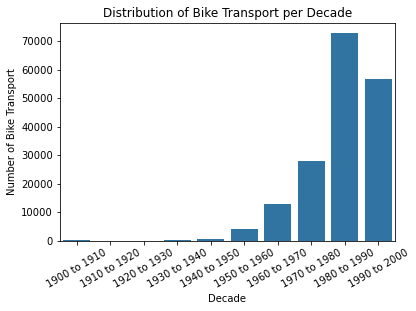

In [24]:
sb.countplot(data=df_copy,x='decade',color=base_color,order=decade_order,label='Decade');
#countplt('decade','Member\'s Decade of Birth')
plt.xticks(rotation=30)
plt.xlabel('Decade')
plt.ylabel('Number of Bike Transport')
plt.title('Distribution of Bike Transport per Decade');

From the plot above, the larger percentages of the users were given birth to between 1980 t0 1990

Extract the time of ride, day and hour from the start_time

In [25]:
df_copy['time_of_day'] = df_copy.start_time.str.extract('(\d{2}:\d{2})')
df_copy['day_of_month'] = df_copy.start_time.str.split('-',expand=True)[2].str.split(' ',expand=True)[0].astype('int')
df_copy['hour_of_day'] = df_copy['time_of_day'].str.split(':',expand=True)[0].astype(int)

In [26]:
df_copy.start_time.describe()

count                       174952
unique                      174941
top       2019-02-11 17:05:07.8400
freq                             2
Name: start_time, dtype: object

In [27]:
df_copy.start_time.tail(20)

183391    2019-02-01 00:37:47.5270
183392    2019-02-01 00:19:45.6410
183393    2019-02-01 00:37:26.3680
183394    2019-02-01 00:27:33.8340
183395    2019-02-01 00:37:23.1150
183396    2019-02-01 00:27:06.5030
183397    2019-02-01 00:28:56.1010
183398    2019-02-01 00:16:59.1550
183399    2019-02-01 00:12:24.2470
183400    2019-02-01 00:23:52.6110
183401    2019-02-01 00:16:48.0620
183403    2019-02-01 00:15:12.0670
183404    2019-02-01 00:12:50.5540
183405    2019-02-01 00:14:49.8740
183406    2019-02-01 00:04:40.6160
183407    2019-02-01 00:04:49.7240
183408    2019-02-01 00:05:34.7440
183409    2019-02-01 00:06:05.5490
183410    2019-02-01 00:05:34.3600
183411    2019-02-01 00:00:20.6360
Name: start_time, dtype: object

In [28]:
hour_order = df_copy.hour_of_day.value_counts().sort_index().index

Question: What hours are there more rides?

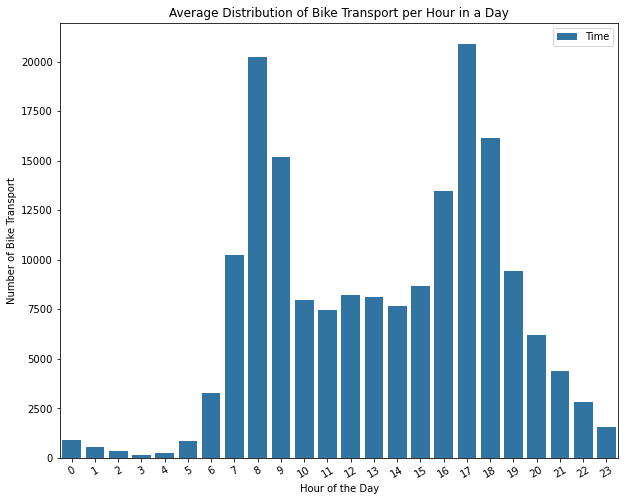

In [30]:
plt.figure(figsize=(10,8))
sb.countplot(data=df_copy,x='hour_of_day',color=base_color,order=hour_order,label='Time');
plt.xticks(rotation=30)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Transport')
plt.title('Average Distribution of Bike Transport per Hour in a Day')
plt.legend();

There are more rides in the early hour of the morning and evening

Question: What days has more ride?

In [31]:
day_index = df_copy.day_of_month.value_counts().sort_index().index

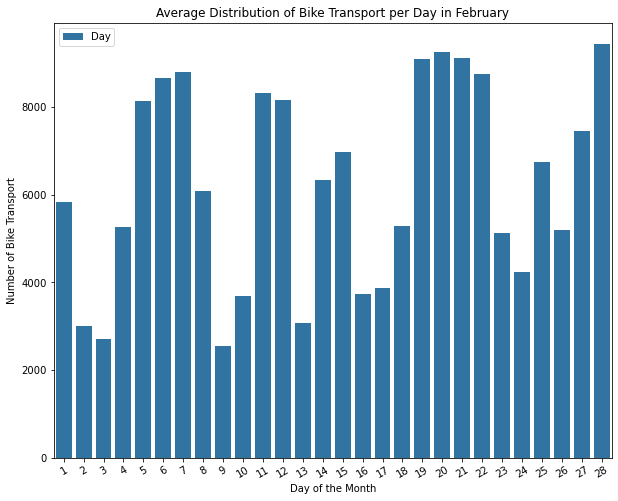

In [32]:
plt.figure(figsize=(10,8))
sb.countplot(data=df_copy,x='day_of_month',color=base_color,order=day_index,label='Day');
plt.xticks(rotation=30)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Bike Transport')
plt.title('Average Distribution of Bike Transport per Day in February')
plt.legend();

There are more rides on weekdays than weekends(Saturday and Sunday)

Extract data of rides in San Francisco alone to analyse the station id

In [33]:
san_francisco = df_copy[df_copy.start_station_name.str.contains('Francis')]

In [34]:
id_order = san_francisco.start_station_id.value_counts().sort_values().index

Question: What station id has more rides?

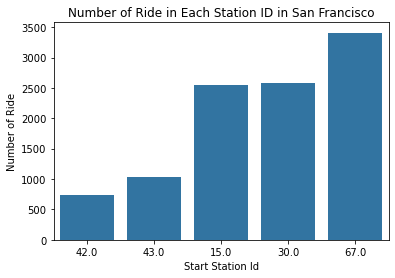

In [35]:
sb.countplot(data=san_francisco,x='start_station_id',color=base_color,order=id_order,label = 'Start Station ID')
plt.xlabel('Start Station Id')
plt.ylabel('Number of Ride')
plt.title('Number of Ride in Each Station ID in San Francisco');

From the plot above, there are more rides from the station with id 67

Calculate the Age of the Users and group into Age group for further analysis

In [36]:
df_copy['Age'] = 2019 - df_copy['member_birth_year']
df_copy.loc[df_copy['Age'] <= 16,'Age_group'] = 'Child'
df_copy.loc[(df_copy['Age'] > 16) & (df_copy['Age'] <= 30),'Age_group'] = 'Youth'
df_copy.loc[(df_copy['Age'] > 30) & (df_copy['Age'] <= 45),'Age_group'] = 'Young Adult'
df_copy.loc[(df_copy['Age'] > 45),'Age_group'] = 'Old Adult'

Question: What Age group took more rides?

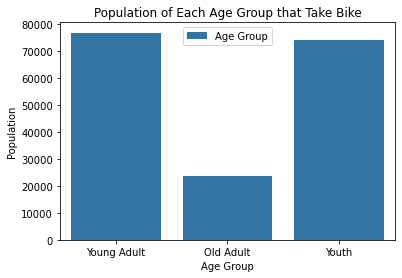

In [37]:
countplt('Age_group','Age Group')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.title('Population of Each Age Group that Take Bike');

The Youth and Young Adult take more rides

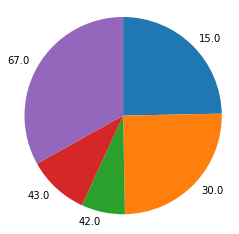

In [38]:
sorted_counts = san_francisco['start_station_id'].value_counts().sort_index()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration has some extremely large valued in the top 0.01 percentage.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I splitted the start time to day_of_month and hour_of_day because the dataset is for a single month to be able to analyse the average demand per hour and day 

## Bivariate Exploration


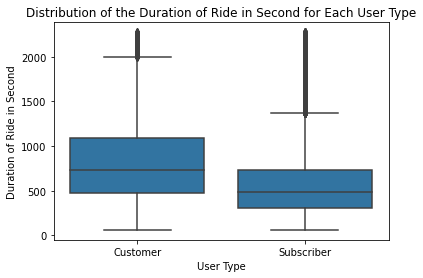

In [125]:
sb.boxplot(data=df_copy,x='user_type',y='duration_sec',color=base_color)
plt.xlabel('User Type')
plt.ylabel('Duration of Ride in Second')
plt.title('Distribution of the Duration of Ride in Second for Each User Type');

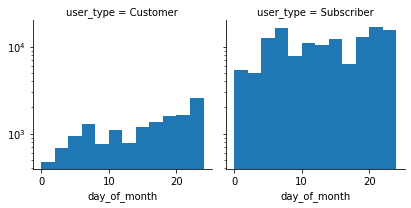

In [49]:
g =sb.FacetGrid(data=df_copy,col='user_type',sharey=True,sharex=True)
g.map(plt.hist,'day_of_month',bins=bin_hour)
plt.yscale('log');


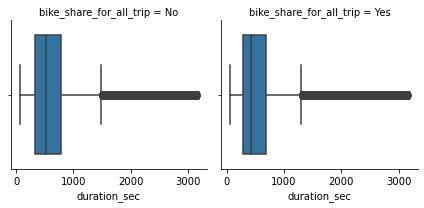

In [45]:
g =sb.FacetGrid(data=df_copy,col='bike_share_for_all_trip',sharey=True,sharex=True)
g.map(sb.boxplot,'duration_sec',order = ['No','Yes']);

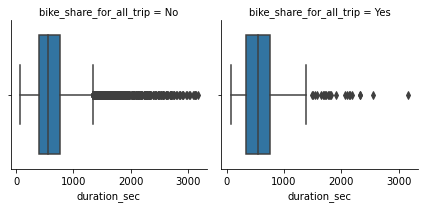

In [46]:
g =sb.FacetGrid(data=san_francisco,col='bike_share_for_all_trip',sharey=True,sharex=True)
g.map(sb.boxplot,'duration_sec',order = ['No','Yes']);

In [68]:
bin_hour =np.arange(0,25,4)

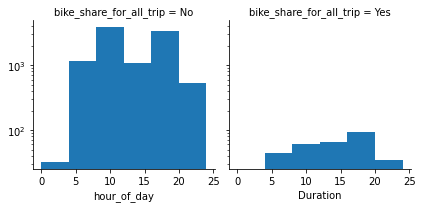

In [69]:
g =sb.FacetGrid(data=san_francisco,col='bike_share_for_all_trip',sharey=True,sharex=True)
g.map(plt.hist,'hour_of_day',bins=bin_hour)
plt.xlabel('Duration')
plt.yscale('log');

In [55]:
bin_day  = np.arange(0,31,5)

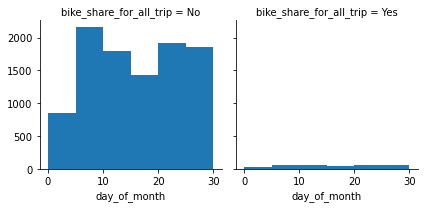

In [58]:
g =sb.FacetGrid(data=san_francisco,col='bike_share_for_all_trip',sharey=True,sharex=True)
g.map(plt.hist,'day_of_month',bins=bin_day);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Averagely, the subscriber ride duration is lesser compared to that of a customer.
> Bike share for all trips ride duration is lesser than the trip not shared.
> Passengers prefer to took more ride individually than share.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The Age group also affects the number of ride, for example in an environment dominated with young adult and youth there will be more rides compared to an environment with adults and children. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

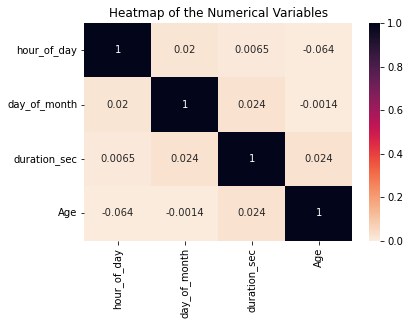

In [63]:
sb.heatmap(df_copy[['hour_of_day','day_of_month','duration_sec','Age']].corr(),
          cmap = 'rocket_r',annot=True,vmin=0)
plt.title('Heatmap of the Numerical Variables');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The numerical features are independent of one another

### Were there any interesting or surprising interactions between features?

> None.

## Conclusions
---After wrangling the data, I carried out a univariate plot on the features and created four new features from two features to have a clearer picture of what happens at each periods.

--- Afterwhich, I carried a bivariate and multivariate exploratory analysis.

--- I found out the following:

--- There are more rides in the morning 7 am and 10 am and evening between 4 pm and 8 pm.

--- User given birth to between 1980 and 1990 take more rides compared to other user.

--- There are usually more rides on Monday to Friday and averagely the maximum rides are on Wednesday.
